In [2]:
from skimage.io import imread
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup as bs
from os.path import join
import numpy as np
from PIL.ImageOps import fit
from PIL import Image

%matplotlib inline

In [3]:
inDirAtt = '/home/ac2211/Downloads/celeba_attributes/list_attr_celeba.txt'
inDirIm='/home/ac2211/Downloads/celeba_attributes/img_align_celeba'
IMSIZE=64

In [ ]:
f = open(inDirAtt)
noSamples = int(f.readline())
print 'There are %d samples' % noSamples
labels = f.readline().split(' ')
print labels, type(labels)
smileIdx = labels.index('Smiling')
print 'Smile index:', smileIdx
dataX = []
dataY = []
for i, line in enumerate(f):
    imName, labels = line.split(' ')[0], line.split(' ')[1:]
    label = np.loadtxt(labels)
    print imName, label
    
    print i
    im = imread(join(inDirIm, imName))
    im = Image.fromarray(im)
    im = fit(im, size=(IMSIZE,IMSIZE))
    label = labels.astype('int')
    im = np.transpose(im, (2,0,1))
    dataX.append(im)
    dataY.append(label)


In [11]:
print np.shape(dataX)
print np.shape(dataY)

np.save('../InData/celebA/xTrain.npy', np.asarray(dataX))
np.save('../InData/celebA/yAllTrain.npy', np.asarray(dataY))

(202599, 3, 64, 64)
(202599,)


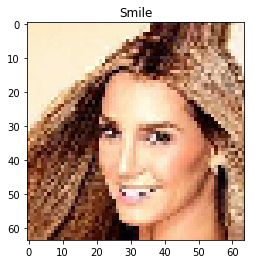

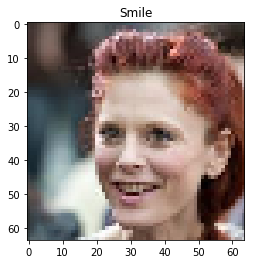

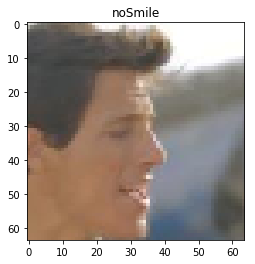

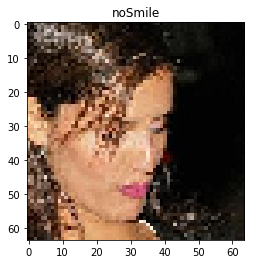

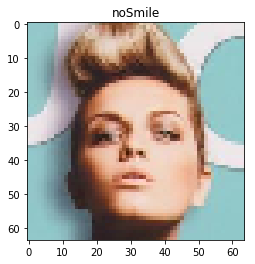

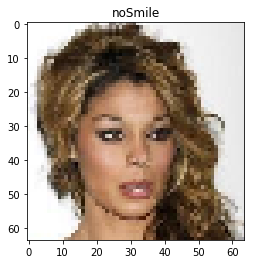

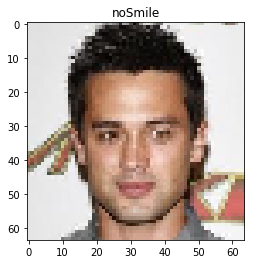

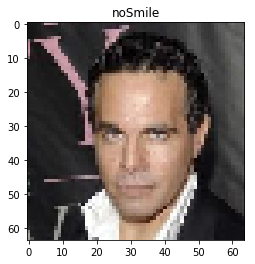

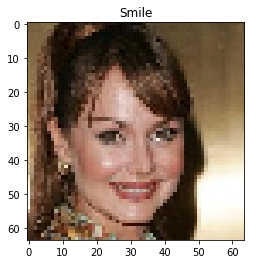

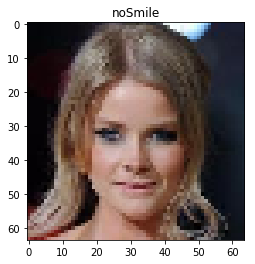

In [38]:
labels=['noSmile', '','Smile']
for i in range(10):
    plt.figure()
    plt.imshow(dataX[i].transpose(1,2,0))
    plt.title(labels[dataY[i, smileIdx]])
